In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


In [3]:
# Cargar el dataset de iris
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Aplicar PCA 2 y PC1 para reducir la dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Separar PC1 y PC2 para modelos específicos
X_pc1 = X_pca[:, 0].reshape(-1, 1)  # Solo PC1
X_pc2 = X_pca[:, 1].reshape(-1, 1)  # Solo PC2


In [21]:
# Función para evaluar un modelo y graficar la matriz de confusión
def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, titulo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Imprimir informe de clasificación
    print(f"Informe de clasificación ({titulo}):")
    print(classification_report(y_test, y_pred))

    # Generar y graficar matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt='d', cbar=False)
    plt.title(f"Matriz de Confusión - {titulo}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

Modelo 1: Regresión logística con PC1

Informe de clasificación (Regresión Logística con PC1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      0.77      0.83        13
           2       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45



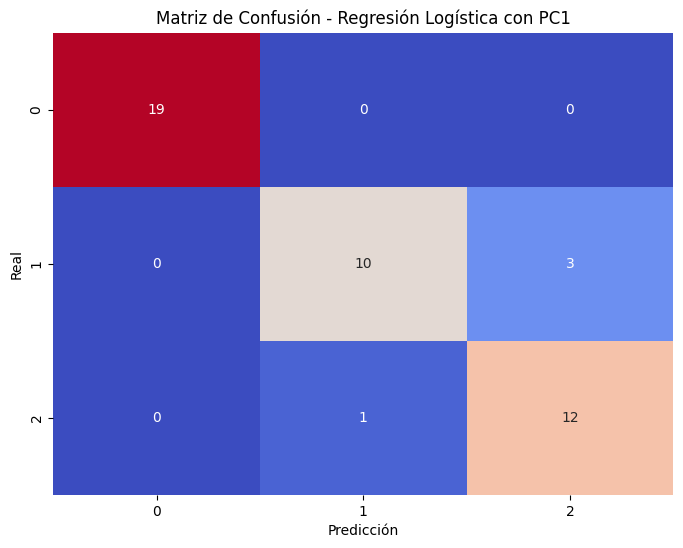

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_pc1, y, test_size=0.3, random_state=42)
logistic_model_pc1 = LogisticRegression()
evaluar_modelo(logistic_model_pc1, X_train, X_test, y_train, y_test, "Regresión Logística con PC1")


Modelo 2: Regresión logística con PC2

Informe de clasificación (Regresión Logística con PC2):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.44      0.54      0.48        13
           2       0.34      0.77      0.48        13

    accuracy                           0.38        45
   macro avg       0.26      0.44      0.32        45
weighted avg       0.23      0.38      0.28        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


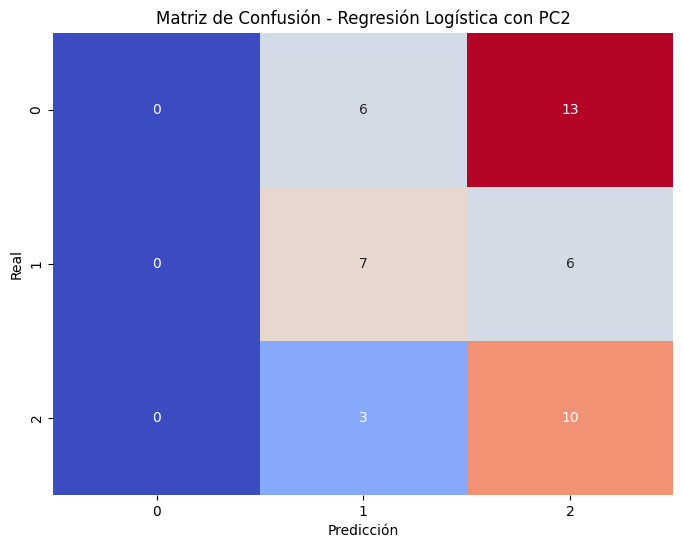

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_pc2, y, test_size=0.3, random_state=42)
logistic_model_pc2 = LogisticRegression()
evaluar_modelo(logistic_model_pc2, X_train, X_test, y_train, y_test, "Regresión Logística con PC2")


 Modelo 3: Árbol de decisión podado con PC1

Informe de clasificación (Árbol de Decisión Podado con PC1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.85      0.88        13
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45



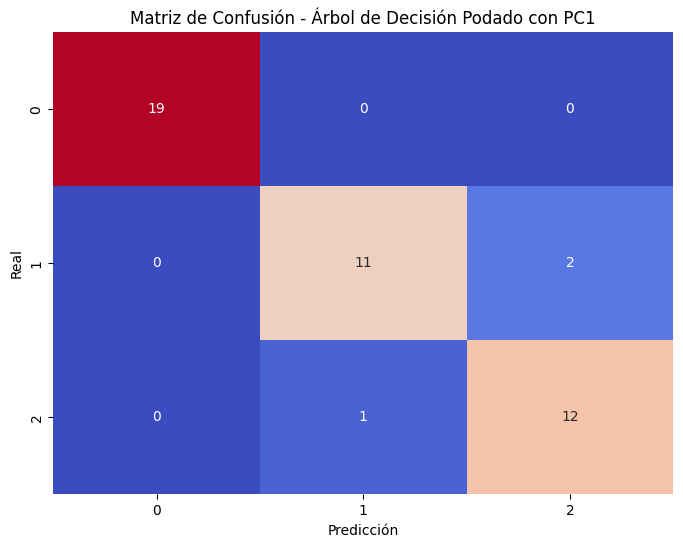

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_pc1, y, test_size=0.3, random_state=42)
tree_model_pc1 = DecisionTreeClassifier(max_depth=3, random_state=42)
evaluar_modelo(tree_model_pc1, X_train, X_test, y_train, y_test, "Árbol de Decisión Podado con PC1")

Modelo 4: Árbol de decisión podado con PC2

Informe de clasificación (Árbol de Decisión Podado con PC2):
              precision    recall  f1-score   support

           0       0.58      0.37      0.45        19
           1       0.57      0.31      0.40        13
           2       0.19      0.38      0.26        13

    accuracy                           0.36        45
   macro avg       0.45      0.35      0.37        45
weighted avg       0.47      0.36      0.38        45



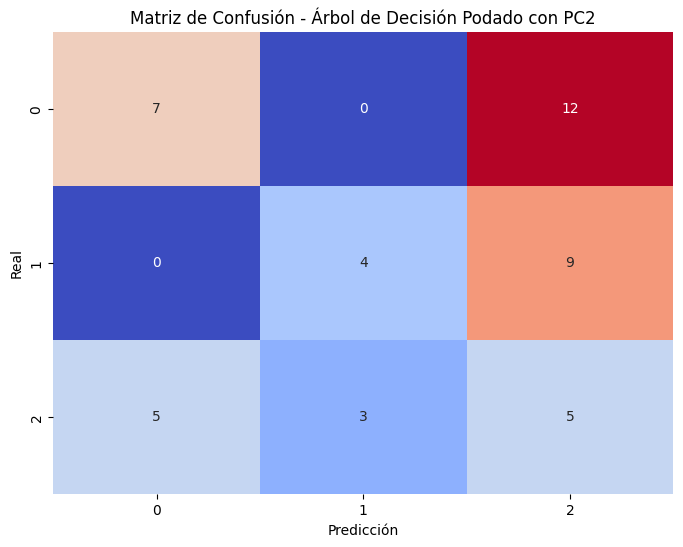

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_pc2, y, test_size=0.3, random_state=42)
tree_model_pc2 = DecisionTreeClassifier(max_depth=3, random_state=42)
evaluar_modelo(tree_model_pc2, X_train, X_test, y_train, y_test, "Árbol de Decisión Podado con PC2")

El mejor modelo es el Arbol de decision podado PC1 , con un acuracy del 93%, ya que todas sus clases tiene buen rendimiento . Tambien en precision global y f1-score .


Tambien el modelo de Regresion Logistica PC1 tiene un buen rendimiento con un acurracy de 91 %  pero es mejor el anterior.

En cambio el Arbol de decision Podado PC" y regresion logistica PC2 tiene un acuraccy muy bajo 36 %  y 38% .